In [102]:
from scipy.io import arff
import numpy as np
import pandas as pd

In [103]:
data = arff.loadarff('chronic_kidney_disease.arff')

In [104]:
columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']

In [105]:
df = pd.DataFrame(data[0])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  pe

In [107]:
data[1]

Dataset: Chronic_Kidney_Disease
	age's type is numeric
	bp's type is numeric
	sg's type is nominal, range is ('1.005', '1.010', '1.015', '1.020', '1.025')
	al's type is nominal, range is ('0', '1', '2', '3', '4', '5')
	su's type is nominal, range is ('0', '1', '2', '3', '4', '5')
	rbc's type is nominal, range is ('normal', 'abnormal')
	pc's type is nominal, range is ('normal', 'abnormal')
	pcc's type is nominal, range is ('present', 'notpresent')
	ba's type is nominal, range is ('present', 'notpresent')
	bgr's type is numeric
	bu's type is numeric
	sc's type is numeric
	sod's type is numeric
	pot's type is numeric
	hemo's type is numeric
	pcv's type is numeric
	wbcc's type is numeric
	rbcc's type is numeric
	htn's type is nominal, range is ('yes', 'no')
	dm's type is nominal, range is ('yes', 'no')
	cad's type is nominal, range is ('yes', 'no')
	appet's type is nominal, range is ('good', 'poor')
	pe's type is nominal, range is ('yes', 'no')
	ane's type is nominal, range is ('yes', 'no'

## Cleaning the data
### missing data

In [108]:
df.isnull().sum()

age        9
bp        12
sg         0
al         0
su         0
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

### removing missing data for now

In [109]:
df = df.dropna()

In [110]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [111]:
df.shape

(215, 25)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 3 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     215 non-null    float64
 1   bp      215 non-null    float64
 2   sg      215 non-null    object 
 3   al      215 non-null    object 
 4   su      215 non-null    object 
 5   rbc     215 non-null    object 
 6   pc      215 non-null    object 
 7   pcc     215 non-null    object 
 8   ba      215 non-null    object 
 9   bgr     215 non-null    float64
 10  bu      215 non-null    float64
 11  sc      215 non-null    float64
 12  sod     215 non-null    float64
 13  pot     215 non-null    float64
 14  hemo    215 non-null    float64
 15  pcv     215 non-null    float64
 16  wbcc    215 non-null    float64
 17  rbcc    215 non-null    float64
 18  htn     215 non-null    object 
 19  dm      215 non-null    object 
 20  cad     215 non-null    object 
 21  appet   215 non-null    object 
 22  pe     

In [113]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
5,60.0,90.0,b'1.015',b'3',b'0',b'?',b'?',b'notpresent',b'notpresent',74.0,...,39.0,7800.0,4.4,b'yes',b'yes',b'no',b'good',b'yes',b'no',b'ckd'
9,53.0,90.0,b'1.020',b'2',b'0',b'abnormal',b'abnormal',b'present',b'notpresent',70.0,...,29.0,12100.0,3.7,b'yes',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
11,63.0,70.0,b'1.010',b'3',b'0',b'abnormal',b'abnormal',b'present',b'notpresent',380.0,...,32.0,4500.0,3.8,b'yes',b'yes',b'no',b'poor',b'yes',b'no',b'ckd'
12,68.0,70.0,b'1.015',b'3',b'1',b'?',b'normal',b'present',b'notpresent',208.0,...,28.0,12200.0,3.4,b'yes',b'yes',b'yes',b'poor',b'yes',b'no',b'ckd'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,b'1.020',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',140.0,...,47.0,6700.0,4.9,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
396,42.0,70.0,b'1.025',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',75.0,...,54.0,7800.0,6.2,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
397,12.0,80.0,b'1.020',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',100.0,...,49.0,6600.0,5.4,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
398,17.0,60.0,b'1.025',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',114.0,...,51.0,7200.0,5.9,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 3 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     215 non-null    float64
 1   bp      215 non-null    float64
 2   sg      215 non-null    object 
 3   al      215 non-null    object 
 4   su      215 non-null    object 
 5   rbc     215 non-null    object 
 6   pc      215 non-null    object 
 7   pcc     215 non-null    object 
 8   ba      215 non-null    object 
 9   bgr     215 non-null    float64
 10  bu      215 non-null    float64
 11  sc      215 non-null    float64
 12  sod     215 non-null    float64
 13  pot     215 non-null    float64
 14  hemo    215 non-null    float64
 15  pcv     215 non-null    float64
 16  wbcc    215 non-null    float64
 17  rbcc    215 non-null    float64
 18  htn     215 non-null    object 
 19  dm      215 non-null    object 
 20  cad     215 non-null    object 
 21  appet   215 non-null    object 
 22  pe     

In [26]:
df.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,52.000000,75.627907,138.688372,53.804651,2.287674,138.795349,4.564651,13.213488,40.358140,8537.674419,4.746977
std,15.517551,14.321122,75.954429,45.430228,2.914442,6.847128,3.001519,2.908360,9.181305,2899.053050,1.038456
min,6.000000,50.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000
25%,42.500000,70.000000,96.000000,26.500000,0.800000,135.000000,3.800000,11.150000,33.500000,6700.000000,4.000000
50%,55.000000,80.000000,117.000000,40.000000,1.200000,139.000000,4.400000,13.800000,42.000000,8100.000000,4.800000
75%,63.000000,80.000000,135.500000,53.000000,2.400000,142.500000,4.900000,15.500000,48.000000,9800.000000,5.500000
max,90.000000,180.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [27]:
X_unencoded = df.drop(columns=['class'])
y_unencoded = df['class']

In [28]:
object_columns = list(filter(lambda x: X_unencoded[x].dtype == 'object', X_unencoded.columns))

In [29]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X = X_unencoded.copy()
X[object_columns] = ordinal_encoder.fit_transform(X_unencoded[object_columns])
y = label_encoder.fit_transform(y_unencoded)

In [30]:
X.shape, y.shape

((215, 24), (215,))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172, 24), (43, 24), (172,), (43,))

In [33]:
X_train.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,51.645349,74.476744,2.994186,1.017442,0.668605,1.50000,1.645349,1.069767,1.034884,136.459302,...,13.377907,41.017442,8580.232558,4.798256,1.284884,1.238372,1.093023,1.127907,1.139535,1.081395
std,15.432814,11.458776,1.201836,1.583814,1.578567,0.82717,0.655013,0.297777,0.239281,71.929494,...,2.885532,9.197936,2970.884830,1.077981,0.465416,0.440804,0.310740,0.334961,0.347516,0.274240
min,12.000000,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,70.000000,...,3.100000,9.000000,3800.000000,2.100000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,41.750000,67.500000,2.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,94.750000,...,11.300000,34.000000,6700.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,54.000000,75.000000,3.000000,0.000000,0.000000,2.00000,2.000000,1.000000,1.000000,113.000000,...,13.950000,43.000000,8050.000000,4.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,63.000000,80.000000,4.000000,2.000000,0.000000,2.00000,2.000000,1.000000,1.000000,134.750000,...,15.600000,48.000000,9800.000000,5.600000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,110.000000,5.000000,5.000000,6.000000,2.00000,2.000000,2.000000,2.000000,447.000000,...,17.800000,54.000000,26400.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 353 to 198
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     172 non-null    float64
 1   bp      172 non-null    float64
 2   sg      172 non-null    float64
 3   al      172 non-null    float64
 4   su      172 non-null    float64
 5   rbc     172 non-null    float64
 6   pc      172 non-null    float64
 7   pcc     172 non-null    float64
 8   ba      172 non-null    float64
 9   bgr     172 non-null    float64
 10  bu      172 non-null    float64
 11  sc      172 non-null    float64
 12  sod     172 non-null    float64
 13  pot     172 non-null    float64
 14  hemo    172 non-null    float64
 15  pcv     172 non-null    float64
 16  wbcc    172 non-null    float64
 17  rbcc    172 non-null    float64
 18  htn     172 non-null    float64
 19  dm      172 non-null    float64
 20  cad     172 non-null    float64
 21  appet   172 non-null    float64
 22  pe   

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = knn.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5348837209302325

## Training Models
### KNN

In [39]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5348837209302325

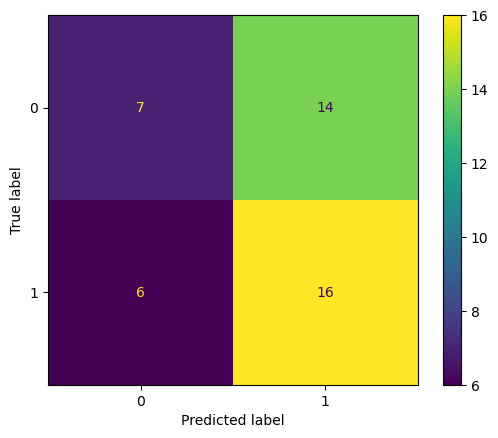

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.show()

### Support Vector Machine

In [41]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6046511627906976

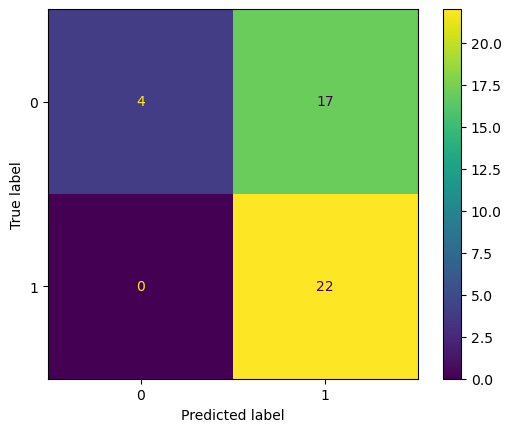

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.show()

### Stocatic Gradient Descent

In [43]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8837209302325582

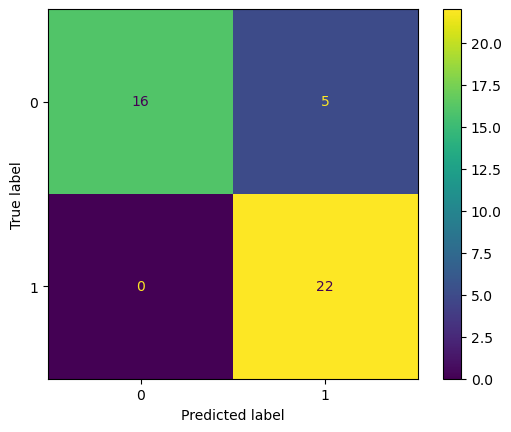

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.show()

### Gaussian Naive Bayes

In [45]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9534883720930233

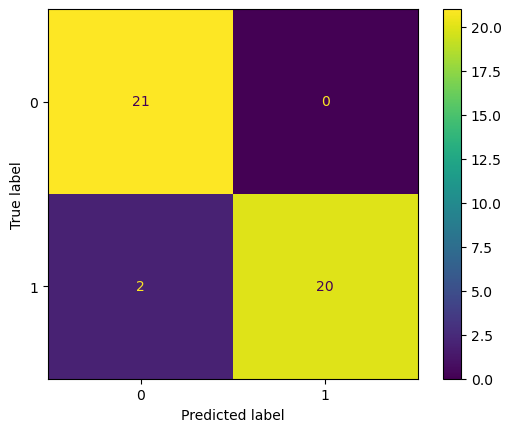

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.show()

### Decision Tree

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

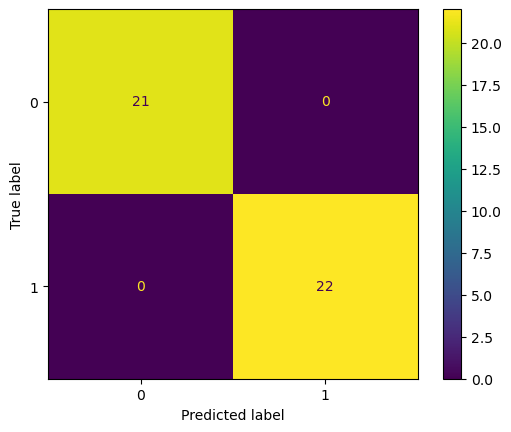

In [48]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.show()

In [49]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(dtc, f)

In [50]:
ordinal_encoder.categories_

[array([b'1.005', b'1.010', b'1.015', b'1.020', b'1.025', b'?'],
       dtype=object),
 array([b'0', b'1', b'2', b'3', b'4', b'?'], dtype=object),
 array([b'0', b'1', b'2', b'3', b'4', b'5', b'?'], dtype=object),
 array([b'?', b'abnormal', b'normal'], dtype=object),
 array([b'?', b'abnormal', b'normal'], dtype=object),
 array([b'?', b'notpresent', b'present'], dtype=object),
 array([b'?', b'notpresent', b'present'], dtype=object),
 array([b'?', b'no', b'yes'], dtype=object),
 array([b'?', b'no', b'yes'], dtype=object),
 array([b'?', b'no', b'yes'], dtype=object),
 array([b'?', b'good', b'poor'], dtype=object),
 array([b'?', b'no', b'yes'], dtype=object),
 array([b'?', b'no', b'yes'], dtype=object)]

In [51]:
label_encoder.classes_

array([b'ckd', b'notckd'], dtype=object)

In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 353 to 198
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     172 non-null    float64
 1   bp      172 non-null    float64
 2   sg      172 non-null    float64
 3   al      172 non-null    float64
 4   su      172 non-null    float64
 5   rbc     172 non-null    float64
 6   pc      172 non-null    float64
 7   pcc     172 non-null    float64
 8   ba      172 non-null    float64
 9   bgr     172 non-null    float64
 10  bu      172 non-null    float64
 11  sc      172 non-null    float64
 12  sod     172 non-null    float64
 13  pot     172 non-null    float64
 14  hemo    172 non-null    float64
 15  pcv     172 non-null    float64
 16  wbcc    172 non-null    float64
 17  rbcc    172 non-null    float64
 18  htn     172 non-null    float64
 19  dm      172 non-null    float64
 20  cad     172 non-null    float64
 21  appet   172 non-null    float64
 22  pe   

In [54]:
X_train['appet']

353    1.0
5      1.0
380    1.0
345    1.0
373    1.0
      ... 
170    1.0
50     2.0
130    2.0
184    2.0
198    2.0
Name: appet, Length: 172, dtype: float64

In [55]:
df['appet']

3      b'poor'
5      b'good'
9      b'poor'
11     b'poor'
12     b'poor'
        ...   
395    b'good'
396    b'good'
397    b'good'
398    b'good'
399    b'good'
Name: appet, Length: 215, dtype: object

In [56]:
object_columns

['sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [57]:
data[1]

Dataset: Chronic_Kidney_Disease
	age's type is numeric
	bp's type is numeric
	sg's type is nominal, range is ('1.005', '1.010', '1.015', '1.020', '1.025')
	al's type is nominal, range is ('0', '1', '2', '3', '4', '5')
	su's type is nominal, range is ('0', '1', '2', '3', '4', '5')
	rbc's type is nominal, range is ('normal', 'abnormal')
	pc's type is nominal, range is ('normal', 'abnormal')
	pcc's type is nominal, range is ('present', 'notpresent')
	ba's type is nominal, range is ('present', 'notpresent')
	bgr's type is numeric
	bu's type is numeric
	sc's type is numeric
	sod's type is numeric
	pot's type is numeric
	hemo's type is numeric
	pcv's type is numeric
	wbcc's type is numeric
	rbcc's type is numeric
	htn's type is nominal, range is ('yes', 'no')
	dm's type is nominal, range is ('yes', 'no')
	cad's type is nominal, range is ('yes', 'no')
	appet's type is nominal, range is ('good', 'poor')
	pe's type is nominal, range is ('yes', 'no')
	ane's type is nominal, range is ('yes', 'no'

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 3 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     215 non-null    float64
 1   bp      215 non-null    float64
 2   sg      215 non-null    object 
 3   al      215 non-null    object 
 4   su      215 non-null    object 
 5   rbc     215 non-null    object 
 6   pc      215 non-null    object 
 7   pcc     215 non-null    object 
 8   ba      215 non-null    object 
 9   bgr     215 non-null    float64
 10  bu      215 non-null    float64
 11  sc      215 non-null    float64
 12  sod     215 non-null    float64
 13  pot     215 non-null    float64
 14  hemo    215 non-null    float64
 15  pcv     215 non-null    float64
 16  wbcc    215 non-null    float64
 17  rbcc    215 non-null    float64
 18  htn     215 non-null    object 
 19  dm      215 non-null    object 
 20  cad     215 non-null    object 
 21  appet   215 non-null    object 
 22  pe     

In [66]:
df.iloc[11]

age               75.0
bp                80.0
sg            b'1.015'
al                b'0'
su                b'0'
rbc               b'?'
pc           b'normal'
pcc      b'notpresent'
ba       b'notpresent'
bgr              156.0
bu                45.0
sc                 2.4
sod              140.0
pot                3.4
hemo              11.6
pcv               35.0
wbcc           10300.0
rbcc               4.0
htn             b'yes'
dm              b'yes'
cad              b'no'
appet          b'poor'
pe               b'no'
ane              b'no'
class           b'ckd'
Name: 26, dtype: object

In [61]:
df['class']

3         b'ckd'
5         b'ckd'
9         b'ckd'
11        b'ckd'
12        b'ckd'
         ...    
395    b'notckd'
396    b'notckd'
397    b'notckd'
398    b'notckd'
399    b'notckd'
Name: class, Length: 215, dtype: object

In [69]:
df[df['class'] == b'ckd']

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
5,60.0,90.0,b'1.015',b'3',b'0',b'?',b'?',b'notpresent',b'notpresent',74.0,...,39.0,7800.0,4.4,b'yes',b'yes',b'no',b'good',b'yes',b'no',b'ckd'
9,53.0,90.0,b'1.020',b'2',b'0',b'abnormal',b'abnormal',b'present',b'notpresent',70.0,...,29.0,12100.0,3.7,b'yes',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
11,63.0,70.0,b'1.010',b'3',b'0',b'abnormal',b'abnormal',b'present',b'notpresent',380.0,...,32.0,4500.0,3.8,b'yes',b'yes',b'no',b'poor',b'yes',b'no',b'ckd'
12,68.0,70.0,b'1.015',b'3',b'1',b'?',b'normal',b'present',b'notpresent',208.0,...,28.0,12200.0,3.4,b'yes',b'yes',b'yes',b'poor',b'yes',b'no',b'ckd'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,64.0,90.0,b'1.015',b'3',b'2',b'?',b'abnormal',b'present',b'notpresent',463.0,...,40.0,9800.0,4.6,b'yes',b'yes',b'no',b'good',b'no',b'yes',b'ckd'
245,48.0,100.0,b'?',b'?',b'?',b'?',b'?',b'notpresent',b'notpresent',103.0,...,19.0,7200.0,2.6,b'yes',b'no',b'yes',b'poor',b'no',b'no',b'ckd'
246,48.0,110.0,b'1.015',b'3',b'0',b'abnormal',b'normal',b'present',b'notpresent',106.0,...,26.0,5000.0,2.5,b'yes',b'no',b'yes',b'good',b'no',b'yes',b'ckd'
248,59.0,70.0,b'1.010',b'1',b'3',b'abnormal',b'abnormal',b'notpresent',b'notpresent',424.0,...,37.0,10200.0,4.1,b'yes',b'yes',b'yes',b'good',b'no',b'no',b'ckd'


In [70]:
df.loc[249]

age               56.0
bp                90.0
sg            b'1.010'
al                b'4'
su                b'1'
rbc          b'normal'
pc         b'abnormal'
pcc         b'present'
ba       b'notpresent'
bgr              176.0
bu               309.0
sc                13.3
sod              124.0
pot                6.5
hemo               3.1
pcv                9.0
wbcc            5400.0
rbcc               2.1
htn             b'yes'
dm              b'yes'
cad              b'no'
appet          b'poor'
pe              b'yes'
ane             b'yes'
class           b'ckd'
Name: 249, dtype: object

In [73]:
X_test

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
226,64.0,100.0,2.0,4.0,2.0,1.0,1.0,1.0,2.0,163.0,...,7.9,26.0,7500.0,3.4,2.0,2.0,1.0,1.0,2.0,1.0
384,57.0,60.0,3.0,0.0,0.0,2.0,2.0,1.0,1.0,132.0,...,15.4,42.0,11000.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0
9,53.0,90.0,3.0,2.0,0.0,1.0,1.0,2.0,1.0,70.0,...,9.5,29.0,12100.0,3.7,2.0,2.0,1.0,2.0,1.0,2.0
317,58.0,70.0,3.0,0.0,0.0,2.0,2.0,1.0,1.0,102.0,...,15.0,40.0,8100.0,4.9,1.0,1.0,1.0,1.0,1.0,1.0
294,75.0,60.0,3.0,0.0,0.0,2.0,2.0,1.0,1.0,110.0,...,14.3,40.0,8300.0,5.8,1.0,1.0,1.0,0.0,0.0,0.0
37,72.0,80.0,5.0,5.0,6.0,0.0,0.0,1.0,1.0,137.0,...,9.7,28.0,6900.0,2.5,2.0,2.0,1.0,2.0,1.0,2.0
25,61.0,60.0,4.0,0.0,0.0,0.0,2.0,1.0,1.0,108.0,...,9.9,29.0,8400.0,3.7,2.0,2.0,1.0,1.0,1.0,2.0
341,63.0,70.0,4.0,0.0,0.0,2.0,2.0,1.0,1.0,130.0,...,13.4,41.0,7300.0,4.7,1.0,1.0,1.0,1.0,1.0,1.0
383,80.0,80.0,4.0,0.0,0.0,2.0,2.0,1.0,1.0,119.0,...,13.9,49.0,5100.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0
259,35.0,80.0,3.0,0.0,0.0,2.0,2.0,1.0,1.0,104.0,...,16.1,45.0,4300.0,5.2,1.0,1.0,1.0,1.0,1.0,1.0


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
5,60.0,90.0,b'1.015',b'3',b'0',b'?',b'?',b'notpresent',b'notpresent',74.0,...,39.0,7800.0,4.4,b'yes',b'yes',b'no',b'good',b'yes',b'no',b'ckd'
9,53.0,90.0,b'1.020',b'2',b'0',b'abnormal',b'abnormal',b'present',b'notpresent',70.0,...,29.0,12100.0,3.7,b'yes',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
11,63.0,70.0,b'1.010',b'3',b'0',b'abnormal',b'abnormal',b'present',b'notpresent',380.0,...,32.0,4500.0,3.8,b'yes',b'yes',b'no',b'poor',b'yes',b'no',b'ckd'
12,68.0,70.0,b'1.015',b'3',b'1',b'?',b'normal',b'present',b'notpresent',208.0,...,28.0,12200.0,3.4,b'yes',b'yes',b'yes',b'poor',b'yes',b'no',b'ckd'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,b'1.020',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',140.0,...,47.0,6700.0,4.9,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
396,42.0,70.0,b'1.025',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',75.0,...,54.0,7800.0,6.2,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
397,12.0,80.0,b'1.020',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',100.0,...,49.0,6600.0,5.4,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
398,17.0,60.0,b'1.025',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',114.0,...,51.0,7200.0,5.9,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'


In [87]:
data = pd.DataFrame(data)

In [92]:
data = df.copy()

In [93]:
df[object_columns] = ordinal_encoder.fit_transform(df[object_columns])

In [95]:
data = df.drop(columns=['class']).loc[249]

In [96]:
data

age        56.0
bp         90.0
sg          1.0
al          4.0
su          1.0
rbc         2.0
pc          1.0
pcc         2.0
ba          1.0
bgr       176.0
bu        309.0
sc         13.3
sod       124.0
pot         6.5
hemo        3.1
pcv         9.0
wbcc     5400.0
rbcc        2.1
htn         2.0
dm          2.0
cad         1.0
appet       2.0
pe          2.0
ane         2.0
Name: 249, dtype: float64

In [99]:
data
data = np.array(data)
data = data.reshape(1, -1)


In [101]:
dtc.predict(data)

/nix/store/z5yyn2n2b8qcawvnka7vdc6a62gjrh2y-python3.12-scikit-learn-1.5.2/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [114]:
df.loc[397]

age               12.0
bp                80.0
sg            b'1.020'
al                b'0'
su                b'0'
rbc          b'normal'
pc           b'normal'
pcc      b'notpresent'
ba       b'notpresent'
bgr              100.0
bu                26.0
sc                 0.6
sod              137.0
pot                4.4
hemo              15.8
pcv               49.0
wbcc            6600.0
rbcc               5.4
htn              b'no'
dm               b'no'
cad              b'no'
appet          b'good'
pe               b'no'
ane              b'no'
class        b'notckd'
Name: 397, dtype: object